In [39]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

In [40]:
img = cv2.imread("test2.jpg")
template = cv2.imread("template.png")

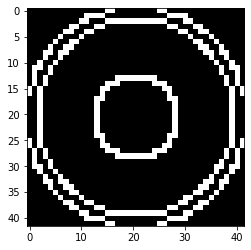

In [41]:
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
plt.imshow(template,cmap="gray")

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
found = None
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])
		# if the resized image is smaller than the template, then break
		# from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc((np.where(result>=0.8)))
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
plt.imshow(img)



error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'minMaxLoc'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
result1 = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
plt.imshow(result16  )


error: OpenCV(4.5.4-dev) /tmp/pip-req-build-iefu5nf2/opencv/modules/imgproc/src/templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'
